# Assignment 2 - Phase 1

## Idea

### Subscribers are more likely to use CitiBike during peak hours than customers

## Null Hypothesis 

### Customers are more likely to use Citibike during peak hours (7am - 9am, 5pm - 7pm) than subscribers during peak hours

## Alternative Hypothesis 

### Subscribers are more likely to use Citibike during peak hours (7am - 9am, 5pm - 7pm) than customers during peak hours 

## Signficance Threshold

### Assumed a 0.05 significance threshold for this experiment 

## Data

### -The experiment was conducted using monthly data from CitiBike ridership information from August 2018.



In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%pylab inline

puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "{}/PUIdata/".format(os.getenv("HOME"))
    puidata = os.getenv("PUIDATA")
print(puidata)

Populating the interactive namespace from numpy and matplotlib
/nfshome/mbh329/PUIdata


In [2]:
os.system ("curl -O https://s3.amazonaws.com/tripdata/201808-citibike-tripdata.csv.zip")

os.system("mv " + "201808-citibike-tripdata.csv.zip " + puidata)

os.system("unzip " + puidata + "/" + "201808-citibike-tripdata.csv.zip" )

os.system("mv " + "201808-citibike-tripdata.csv " + puidata)




0

In [3]:
datestring = '201808'

In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01 00:00:07.321
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01 00:00:19.748
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01 00:00:21.175
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01 00:00:26.470
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01 00:00:30.291


In [5]:
df.columns 

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
df['userhour'] = pd.to_datetime(df['starttime']).dt.hour

In [7]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'birth year',
       'gender', 'date'], axis=1, inplace=True)  #having issues with unexpected EQF 
      

In [8]:
df.head(15)

,usertype,userhour
0,Subscriber,0
1,Subscriber,0
2,Subscriber,0
3,Subscriber,0
4,Subscriber,0
5,Customer,0
6,Subscriber,0
7,Subscriber,0
8,Subscriber,0
9,Subscriber,0


In [9]:
pivot = df.groupby(['userhour', 'usertype'])['usertype'].count().unstack()

In [10]:
print(type(pivot))

<class 'pandas.core.frame.DataFrame'>


In [11]:
pivot.head(5)

usertype,Customer,Subscriber
userhour,,
0,2966,15585
1,1729,8808
2,1084,5118
3,693,3289
4,480,3529


In [12]:
pivot['Customer'].sum()

273721

In [13]:
pivot['cust_perc'] = pivot['Customer'] / pivot['Customer'].sum()
pivot['subs_perc'] = pivot['Subscriber'] / pivot['Subscriber'].sum()

In [14]:
pivot

usertype,Customer,Subscriber,cust_perc,subs_perc
userhour,,,,
0,2966,15585,0.010836,0.009149
1,1729,8808,0.006317,0.005171
2,1084,5118,0.003960,0.003004
3,693,3289,0.002532,0.001931
4,480,3529,0.001754,0.002072
5,558,12214,0.002039,0.007170
6,1575,43395,0.005754,0.025475
7,3063,84408,0.011190,0.049551
8,6194,147039,0.022629,0.086318


Text(0,0.5,'daily percentage')

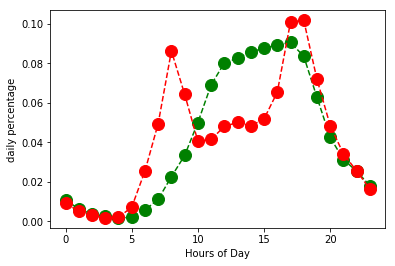

In [15]:
plt.plot(pivot.index, pivot.cust_perc, color='green', marker='o', linestyle='dashed', linewidth=1.5, markersize=12)
plt.plot(pivot.index, pivot.subs_perc, color='red', marker='o', linestyle='dashed', linewidth=1.5, markersize=12)
plt.xlabel('Hours of Day')
plt.ylabel('daily percentage')

Figure 1: This diagram shows the relationship between the hours of the day (0-23) and the percentage of riders that use CitiBike during a daily cycle throughout August 2018. SUBSCRIBERS are shown in RED and CUSTOMERS are shown in GREEN.

## Conclusion

### From the diagram above, we can reject our null hypothesis and accept our alternative hypothesis: that Subscribers are more likely to use Citibike during peak hours (7am - 9am, 5pm - 7pm) than customers during peak hours. It is also interesting to note that customer ridership spikes during the day time while subscriber ridership falls. This might infer that subscribers are majority commuters and utilize citibike primarily to get to and from work. 